In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_science_job.csv")

In [9]:
df.isnull().mean()*100


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
df.shape

(19158, 13)

In [22]:
df[df['target']==1]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,52.0,1.0
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3.0,100-500,Pvt Ltd,40.0,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,36.0,1.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0


In [21]:
df.sample(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
16079,5837,city_75,0.939,Male,No relevent experience,Full time course,Graduate,STEM,8.0,10000+,Public Sector,NaN,0.0
18077,8706,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,10.0,50-99,Pvt Ltd,6.0,0.0
908,23295,city_123,0.738,Male,Has relevent experience,no_enrollment,Masters,STEM,12.0,100-500,Pvt Ltd,216.0,0.0


In [19]:
df['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


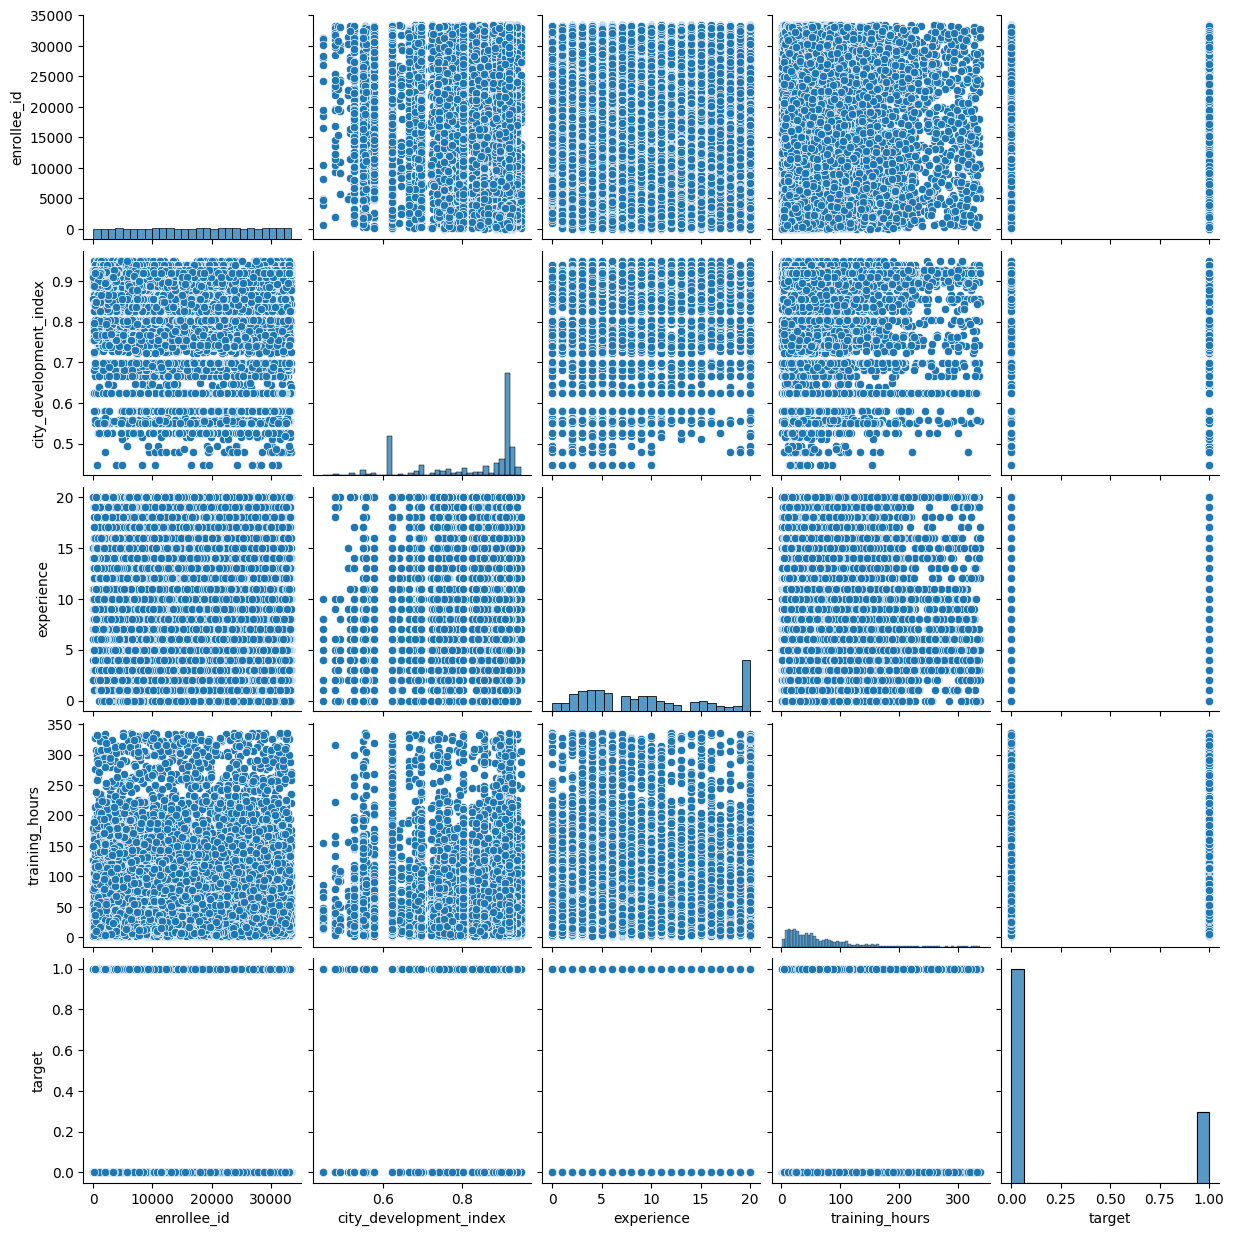

In [23]:
sns.pairplot(df)

In [30]:
col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [31]:
df[col].sample(3)

,city_development_index,enrolled_university,education_level,experience,training_hours
8213,0.920,no_enrollment,Graduate,10.0,188.0
4439,0.896,no_enrollment,Masters,13.0,224.0
4732,0.624,no_enrollment,Masters,5.0,162.0


In [33]:
len(df[col].dropna())/(len(df))

0.8968577095730244

In [34]:
new_df = df[col].dropna()

In [38]:
new_df.isnull().mean()*100

city_development_index    0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
training_hours            0.0
dtype: float64

In [40]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

<Axes: >

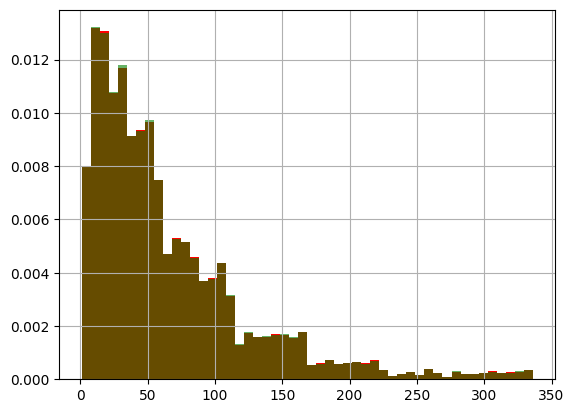

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')
new_df['training_hours'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.6)

<Axes: >

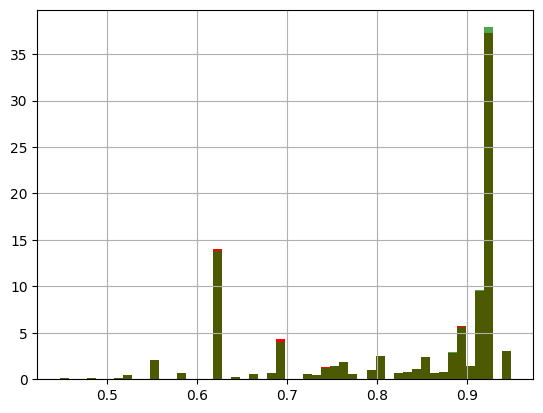

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')
new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.7)

<Axes: >

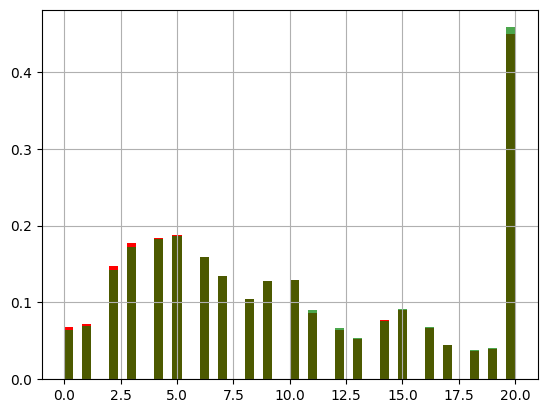

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['experience'].hist(bins=50,ax=ax,density=True,color='red')
new_df['experience'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.7)

<Axes: >

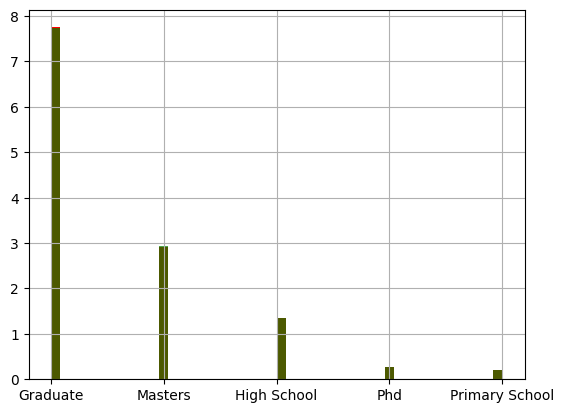

In [61]:
fig = plt.figure()
ax = fig.add_subplot()
df['education_level'].hist(bins=50,ax=ax,density=True,color='red')
new_df['education_level'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.7)

In [69]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    new_df['enrolled_university'].value_counts() / len(new_df)
],axis=1)
temp.columns = ['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [70]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df),
    new_df['education_level'].value_counts() / len(new_df)
],axis=1)
temp

,count,count
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
